# Practical Financial Balance in Electricity Markets

#### Importing the needed packages
The first step in every python notebook is to install the needed packages (e.g. [`pandas`](https://pandas.pydata.org/docs/user_guide/index.html) for data management) as well as functions and classes from external scripts.

In [1]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<style>
.custom-text {
  color: darkblue;
}
@media (prefers-color-scheme: dark) {
  .custom-text {
    color: lightblue;
  }
}
</style>

In [2]:
from illuminator.engine import Simulation
import functions_T2
import pandas as pd
import nest_asyncio
nest_asyncio.apply()
from IPython.display import HTML


#### The Value of Electricity
One key characteristic of electricity as a good is the difficulty of storing it. Because of this, supply and demand must be continuously balanced in the electricity grid. The electricity demand throughout the day depends on the consumer pattern. Therefore, electricity has a different market value at different hours of the day. Furthermore, electricity prices are also strongly dependent on fuel costs (e.g. natural gas) and $\text{CO}_2$ prices. Additional information can be found on: https://www.tennet.eu/overview-electricity-market.

#### Day-Ahead Market 
On the day-ahead market, participants can sell and buy electricity in a pan-European auction for the next day in hourly blocks. The day-ahead market is cleared at 12:00 o’clock noon each day of the year. During market clearning, the intersection of demand and offered quantity (supply) determines the electricity price and volume for each hour. This price is then either paid (consumers) or received (suppliers) by all market participants who were successful in the auction.

Because the day-ahead market is organized short before delivery and has a single clearing price (per hour), it reflects the value of electricity during different hours the best. The clearing price of the day-ahead market is therefore often referred to as “the electricity price”. The price is determined per bidding zone, which in Europe mostly corresponds to the borders of a country.

Source: https://www.tennet.eu/market-types

#### Introduction: The Market in this Tutorial
The market in this tutorial is mimicking a single hour in the European Day-Ahead Market. There are three (and in the last exercise four) companies competing, which bid their power plants in a single price auction. The demand in this tutorial is completely inelastic (set to a fixed value).

Side Note: The costs of generating electricity for the different generation sources are estimated based on LCOE values in the IEA report 'Projected Costs of Generating Electricity 2020'. The report can be found under:
https://www.iea.org/reports/projected-costs-of-generating-electricity-2020

For renewables the costs are estimated based on the LCOE values as found in the report by IRENA:
https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2024/Sep/IRENA_Renewable_power_generation_costs_in_2023.

<img src="Graphics_T2/Installed_capacity_per_company_graphic.png" alt="companies portfolio" width="800">

The Portfolios of the 3 companies can also be seen in the table below. The table also displays the variable costs of each generation unit of each company.

<img src="Graphics_T2/portfolios_companies.png" alt="T2_companies" width="800">

<span class="custom-text">

#### Task 1: Day-Ahead Market with Conventional Generation

In this task, the 3 companies own different types of conventional power plants that they use to bid in the Day-Ahead Market. The 'Tutorial_market_conventional_case.yaml' file includes the set up of the simulation and the demand can be varied with the set_input() function.

a) Run the simulation with the code below and generate the Merit Order Curve with the create_merit_order_curve function in the following cell. Looking at the market result presented in the Merit Order Curve what do you observe? Elaborate on how the market clearing is determined. 

b) Do some companies have advantages over others? If yes, why is that the case? 

c) How does a decrease or increase in demand change the result (you can experiment by adjusting the `demand` value in the code below)? Test and analyze the following demand scenarios:

        - demand decrease 1000
        
        - demand decrease 2000
        
        - demand increase 4000
        
        - demand increase 5000
        

</span>


In [11]:
CONFIG_FILE = 'Tutorial_market_conventional_case.yaml'
simulation_conventional = Simulation(CONFIG_FILE)
demand = 1000

portfolio_company_1 = [
        {'Technology': 'Oil', 'Capacity (MW)': 300, 'Cost (€/MWh)': 104, 'Availability': 1},
        {'Technology': 'Nuclear', 'Capacity (MW)': 700, 'Cost (€/MWh)': 70, 'Availability': 1},
        {'Technology': 'Gas (CCGT)', 'Capacity (MW)': 400, 'Cost (€/MWh)': 85, 'Availability': 1},
        {'Technology': 'Gas (OCGT)', 'Capacity (MW)': 200, 'Cost (€/MWh)': 75, 'Availability': 1}
    ]

portfolio_company_2 = [
        {'Technology': 'Coal', 'Capacity (MW)': 600, 'Cost (€/MWh)': 92, 'Availability': 1},
        {'Technology': 'Gas (CCGT)', 'Capacity (MW)': 500, 'Cost (€/MWh)': 82, 'Availability': 1},
        {'Technology': 'Gas (OCGT)', 'Capacity (MW)': 150, 'Cost (€/MWh)': 70, 'Availability': 1},
        {'Technology': 'Hydro', 'Capacity (MW)': 150, 'Cost (€/MWh)': 75, 'Availability': 1}
    ]

portfolio_company_3 = [
        {'Technology': 'Coal', 'Capacity (MW)': 550, 'Cost (€/MWh)': 90, 'Availability': 1},
        {'Technology': 'Gas (CCGT)', 'Capacity (MW)': 550, 'Cost (€/MWh)': 80, 'Availability': 1},
        {'Technology': 'Gas (OCGT)', 'Capacity (MW)': 200, 'Cost (€/MWh)': 76, 'Availability': 1},
        {'Technology': 'Hydro','Capacity (MW)': 100, 'Cost (€/MWh)': 78, 'Availability': 1}
    ]
simulation_conventional.set_model_state('Operator1', 'demand', demand)

simulation_conventional.run()



        ____                              _ _
       /    \                            (_) |
  ____/      \  _ __ ___   ___  ___  __ _ _| | __
 /    \      / | '_ ` _ \ / _ \/ __|/ _` | | |/ / 
/      \____/  | | | | | | (_) \__ \ (_| | |   <     
\      /    \  |_| |_| |_|\___/|___/\__,_|_|_|\_\    
 \____/      \____
 /    \      /    \    mosaik version:     3.3.3
/      \____/      \   mosaik API version: 3.0.11
\      /    \      /   Python version:     3.11.1
 \____/      \____/    OS:                 Windows-10-10.0.26100-SP0
      \      /         Documentation:      https://mosaik.readthedocs.io/en/3.3.3/
       \____/          Get in touch:       https://github.com/orgs/OFFIS-mosaik/discussions


2025-05-19 11:10:31.818 | INFO     | mosaik.scenario:start:311 - Starting "Collector" as "Collector-0" ...


C:\Users\jana9\PycharmProjects\illuminator_test\Illuminator\examples\Tutorial2


2025-05-19 11:10:33.383 | INFO     | mosaik.scenario:start:311 - Starting "Company1" as "Company1-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company1-0 is using an outdated API version, namely 1. It should still work. You can suppress this warning by adding an explicit API version for this simulator in your SimConfig.
  warnings.warn(
2025-05-19 11:10:33.387 | INFO     | mosaik.scenario:start:311 - Starting "Company2" as "Company2-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company2-0 is using an outdated API version, namely 1. It should still work. You can suppress this warning by adding an explicit API version for this simulator in your SimConfig.
  warnings.warn(
2025-05-19 11:10:33.390 | INFO     | mosaik.scenario:start:311 - Starting "Company3" as "Company3-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company3-0 is using an outdated API version, namely 1. I

running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x0000012DC14C6A10>, eid='time-based_0', sid='Company1-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x0000012DC14C6A10>, eid='time-based_0', sid='Company1-0', children=[])], 'Company2': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x0000012DC423C710>, eid='time-based_0', sid='Company2-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x0000012DC14C6A10>, eid='time-based_0', sid='Company1-0', children=[])], 'Company2': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x0000012DC423C710>, eid='time-based_0', sid='Company2-0', children=[])], 'Company3': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x0000012DC425CE10>, eid='time-based_0', sid='Company3-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 

100%|██████████| 1/1 [00:00<00:00, 28.44steps/s]
2025-05-19 11:10:33.430 | INFO     | mosaik.scenario:run:708 - Simulation finished successfully.


Market Clearing Price: 75 €/MWh
    Company Supplied Capacity (MW) Revenue (€) Total Costs (€) Profit (€)
0  Company1                    850       63750           60250       3500
1  Company2                    150       11250           10500        750
2  Company3                      0           0               0          0


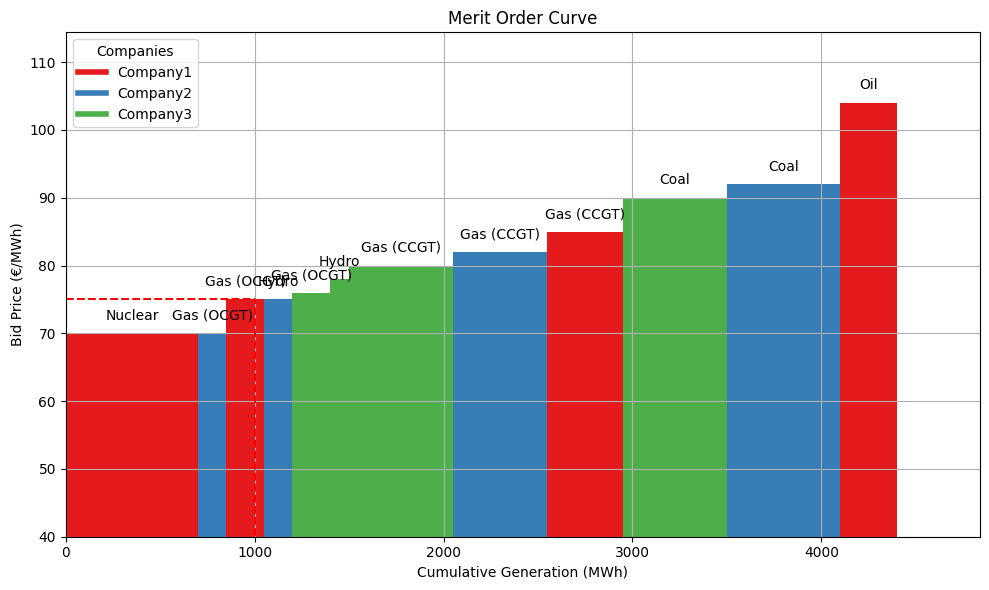

In [12]:
functions_T2.create_merit_order_curve( all_bids_sorted_csv = r'.\results_operator\all_bids_sorted_0.csv', demand = demand, market_result_csv= r'./out_Tutorial2_conventionalgeneration.csv', date = '2024-01-01')

Now, all three companies have expanded their portofolio by investing in renewable energy, namely solar and wind. 



#### Task 2: Day-Ahead Market with RES Capacities

Like in task one the simulation set up is specified in a yaml file ('Tutorial_market_RES_case.yaml') and the demand can be varied with the set_model_state() function.

a) Run the following simulation and compare the results to task 1. How did the Merit Order curve change? What effect has the integration of renewables on the market balance? 

b) Adjust the demand in the same way as you did in task 1. How does the case of renewables compare to the conventional case for a lower and higher demand?

c) What happens if you increase the installed capacity of renewables even more? You can test different levels of demand. </font>

In [12]:
CONFIG_FILE = 'Tutorial_market_RES_case.yaml'
simulation_RES = Simulation(CONFIG_FILE)
demand = 3000

portfolio_company_1 = [
        {'Technology': 'Oil', 'Capacity (MW)': 300, 'Cost (€/MWh)': 104, 'Availability': 1},
        {'Technology': 'Nuclear', 'Capacity (MW)': 700, 'Cost (€/MWh)': 70, 'Availability': 1},
        {'Technology': 'Gas (CCGT)', 'Capacity (MW)': 400, 'Cost (€/MWh)': 85, 'Availability': 1},
        {'Technology': 'Gas (OCGT)', 'Capacity (MW)': 200, 'Cost (€/MWh)': 75, 'Availability': 1},
        {'Technology' : 'Wind', 'Capacity (MW)': 180, 'Cost (€/MWh)': 53, 'Availability': 0.55},
        {'Technology' : 'Solar', 'Capacity (MW)': 100, 'Cost (€/MWh)': 40, 'Availability': 0.34}
    ]

portfolio_company_2 = [
        {'Technology': 'Coal', 'Capacity (MW)': 600, 'Cost (€/MWh)': 92, 'Availability': 1},
        {'Technology': 'Gas (CCGT)', 'Capacity (MW)': 500, 'Cost (€/MWh)': 82, 'Availability': 1},
        {'Technology': 'Gas (OCGT)', 'Capacity (MW)': 150, 'Cost (€/MWh)': 70, 'Availability': 1},
        {'Technology': 'Hydro', 'Capacity (MW)': 150, 'Cost (€/MWh)': 75, 'Availability': 1},
        {'Technology' : 'Wind', 'Capacity (MW)': 250, 'Cost (€/MWh)': 55, 'Availability': 0.55},
        {'Technology' : 'Solar', 'Capacity (MW)': 180, 'Cost (€/MWh)': 42, 'Availability': 0.34}
    ]

portfolio_company_3 = [
        {'Technology': 'Coal', 'Capacity (MW)': 550, 'Cost (€/MWh)': 90, 'Availability': 1},
        {'Technology': 'Gas (CCGT)', 'Capacity (MW)': 550, 'Cost (€/MWh)': 80, 'Availability': 1},
        {'Technology': 'Gas (OCGT)', 'Capacity (MW)': 200, 'Cost (€/MWh)': 76, 'Availability': 1},
        {'Technology': 'Hydro','Capacity (MW)': 100, 'Cost (€/MWh)': 78, 'Availability': 1},
        {'Technology' : 'Wind', 'Capacity (MW)': 200, 'Cost (€/MWh)': 52, 'Availability': 0.55},
        {'Technology' : 'Solar', 'Capacity (MW)': 175, 'Cost (€/MWh)': 45, 'Availability': 0.34}
    ]
simulation_RES.set_model_state('Operator1', 'demand', demand)

simulation_RES.run()


        ____                              _ _
       /    \                            (_) |
  ____/      \  _ __ ___   ___  ___  __ _ _| | __
 /    \      / | '_ ` _ \ / _ \/ __|/ _` | | |/ / 
/      \____/  | | | | | | (_) \__ \ (_| | |   <     
\      /    \  |_| |_| |_|\___/|___/\__,_|_|_|\_\    
 \____/      \____
 /    \      /    \    mosaik version:     3.3.3
/      \____/      \   mosaik API version: 3.0.11
\      /    \      /   Python version:     3.11.1
 \____/      \____/    OS:                 Windows-10-10.0.26100-SP0
      \      /         Documentation:      https://mosaik.readthedocs.io/en/3.3.3/
       \____/          Get in touch:       https://github.com/orgs/OFFIS-mosaik/discussions


2025-04-14 21:51:43.019 | INFO     | mosaik.scenario:start:311 - Starting "Collector" as "Collector-0" ...


C:\Users\jana9\PycharmProjects\illuminator_test\Illuminator\examples\Tutorial2


2025-04-14 21:51:44.782 | INFO     | mosaik.scenario:start:311 - Starting "Company1" as "Company1-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company1-0 is using an outdated API version, namely 1. It should still work. You can suppress this warning by adding an explicit API version for this simulator in your SimConfig.
  warnings.warn(
2025-04-14 21:51:44.782 | INFO     | mosaik.scenario:start:311 - Starting "Company2" as "Company2-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company2-0 is using an outdated API version, namely 1. It should still work. You can suppress this warning by adding an explicit API version for this simulator in your SimConfig.
  warnings.warn(
2025-04-14 21:51:44.782 | INFO     | mosaik.scenario:start:311 - Starting "Company3" as "Company3-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company3-0 is using an outdated API version, namely 1. I

running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365AC99190>, eid='time-based_0', sid='Company1-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365AC99190>, eid='time-based_0', sid='Company1-0', children=[])], 'Company2': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365A6D8A10>, eid='time-based_0', sid='Company2-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365AC99190>, eid='time-based_0', sid='Company1-0', children=[])], 'Company2': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365A6D8A10>, eid='time-based_0', sid='Company2-0', children=[])], 'Company3': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365ACDFC90>, eid='time-based_0', sid='Company3-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 

100%|██████████| 1/1 [00:00<00:00,  8.96steps/s]
2025-04-14 21:51:44.909 | INFO     | mosaik.scenario:run:708 - Simulation finished successfully.


Market Clearing Price: 0 €/MWh
    Company  Supplied Capacity (MW)  Revenue (€)  Total Costs (€)  Profit (€)
0  Company1                  1733.0          0.0         135807.0   -135807.0
1  Company2                  1598.7          0.0         128082.9   -128082.9
2  Company3                  1569.5          0.0         124897.5   -124897.5


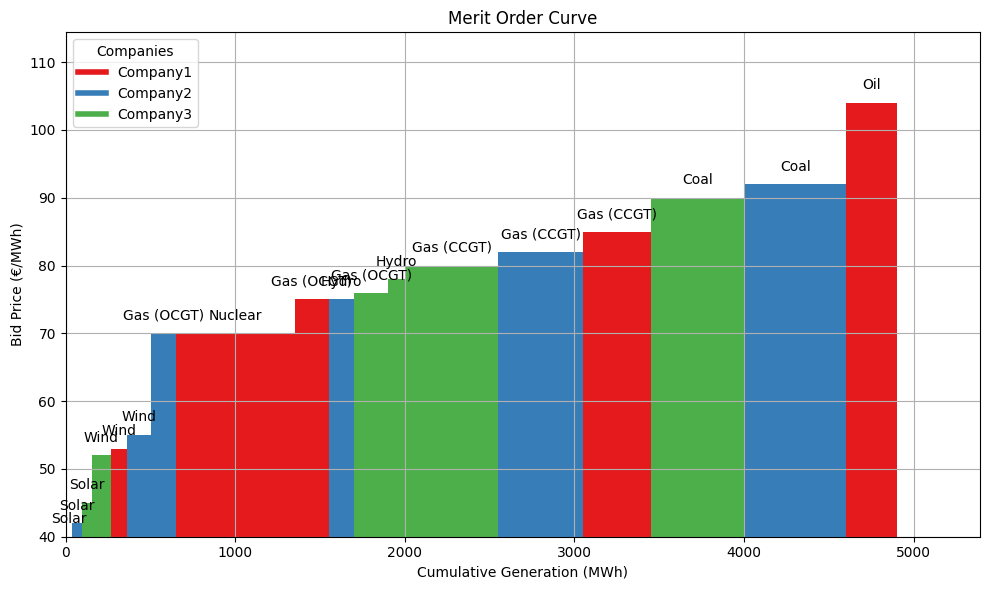

In [13]:
functions_T2.create_merit_order_curve( all_bids_sorted_csv = r'.\results_operator\all_bids_sorted_0.csv', demand = demand, market_result_csv= r'./out_Tutorial2_RESgeneration.csv', date = '2024-01-01')



#### Task 3: Competing in the Day-Ahead Market

Now you become the forth company (<i>Company 4</i>) on the market with the portfolio according to the `portfolio_own` element. The figure below illustrates the portfolios of all companies. Think of a bidding strategy for each of your generating units. You can adjust your bid capacity and price for the different generation units in the `your_bids` dictionary (actually a dictionary with a list of nested dictionaries). 

a) Come up with an initial bidding strategy and run the code. Look at the resulting Merit Order curve and your revenue. How did you do compared to your competitors?

b) Try out at least 3 different bidding strategies and run the simulation. How are you doing compared to your competitors? 

c) Draw a final conclusion based on the results for your different strategies: What is a good bidding strategy in your opinion? 

d) Bonus: Derive the bidding strategy of your competitors based on all previous results (all follow the same strategy). Can you use this knowledge for your advantage? </font>

<img src="Graphics_T2/Installed_Capacity_4Companies_RES.svg" alt="T2_companies" width="800">

In [14]:
#This is the template for your bids. You can adjust the values of the bid capacity and the bid price to try different strategies.
CONFIG_FILE = 'Tutorial_market_company4.yaml'
simulation_company_4 = Simulation(CONFIG_FILE)
demand = 6000

your_portfolio = [
        {'Technology': 'Oil', 'Capacity (MW)': 100, 'Cost (€/MWh)': 110, 'Availability': 1},
        {'Technology': 'Coal', 'Capacity (MW)': 600, 'Cost (€/MWh)': 91, 'Availability': 1},
        {'Technology': 'Gas (CCGT)', 'Capacity (MW)': 300, 'Cost (€/MWh)': 87, 'Availability': 1},
        {'Technology': 'Gas (OCGT)', 'Capacity (MW)': 400, 'Cost (€/MWh)': 74, 'Availability': 1},
        {'Technology' : 'Wind', 'Capacity (MW)': 250, 'Cost (€/MWh)': 56, 'Availability': 0.55},
        {'Technology' : 'Solar', 'Capacity (MW)': 100, 'Cost (€/MWh)': 38, 'Availability': 0.34}
    ]

#Please adjust the following bids for your different power plants
your_bids =[
    {'Bid Capacity (MW)': 100, 'Bid Price (€/MWh)': 200}, # Bid for your oil power plant
    {'Bid Capacity (MW)': 900, 'Bid Price (€/MWh)': 50}, # Bid for your coal power plant
    {'Bid Capacity (MW)': 300, 'Bid Price (€/MWh)': 70}, # Bid for your gas (CCGT) power plant
    {'Bid Capacity (MW)': 400, 'Bid Price (€/MWh)': 100}, # Bid for your gas (OCGT) power plant
    {'Bid Capacity (MW)': 200, 'Bid Price (€/MWh)': 50}, # Bid for your wind power plant
    {'Bid Capacity (MW)': 200, 'Bid Price (€/MWh)': 50} # Bid for your solar power plant
    ]

simulation_company_4.set_model_param('Company4', 'bids_manual', your_bids)
simulation_company_4.set_model_state('Operator1', 'demand', demand)

simulation_company_4.run()


        ____                              _ _
       /    \                            (_) |
  ____/      \  _ __ ___   ___  ___  __ _ _| | __
 /    \      / | '_ ` _ \ / _ \/ __|/ _` | | |/ / 
/      \____/  | | | | | | (_) \__ \ (_| | |   <     
\      /    \  |_| |_| |_|\___/|___/\__,_|_|_|\_\    
 \____/      \____
 /    \      /    \    mosaik version:     3.3.3
/      \____/      \   mosaik API version: 3.0.11
\      /    \      /   Python version:     3.11.1
 \____/      \____/    OS:                 Windows-10-10.0.26100-SP0
      \      /         Documentation:      https://mosaik.readthedocs.io/en/3.3.3/
       \____/          Get in touch:       https://github.com/orgs/OFFIS-mosaik/discussions


2025-04-14 21:51:45.516 | INFO     | mosaik.scenario:start:311 - Starting "Collector" as "Collector-0" ...


C:\Users\jana9\PycharmProjects\illuminator_test\Illuminator\examples\Tutorial2


2025-04-14 21:51:47.450 | INFO     | mosaik.scenario:start:311 - Starting "Company1" as "Company1-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company1-0 is using an outdated API version, namely 1. It should still work. You can suppress this warning by adding an explicit API version for this simulator in your SimConfig.
  warnings.warn(
2025-04-14 21:51:47.450 | INFO     | mosaik.scenario:start:311 - Starting "Company2" as "Company2-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company2-0 is using an outdated API version, namely 1. It should still work. You can suppress this warning by adding an explicit API version for this simulator in your SimConfig.
  warnings.warn(
2025-04-14 21:51:47.466 | INFO     | mosaik.scenario:start:311 - Starting "Company3" as "Company3-0" ...
C:\Users\jana9\Lib\site-packages\mosaik\adapters.py:98: UserWarning: Simulator Company3-0 is using an outdated API version, namely 1. I

running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365AC27ED0>, eid='time-based_0', sid='Company1-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365AC27ED0>, eid='time-based_0', sid='Company1-0', children=[])], 'Company2': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365AC073D0>, eid='time-based_0', sid='Company2-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365AC27ED0>, eid='time-based_0', sid='Company1-0', children=[])], 'Company2': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365AC073D0>, eid='time-based_0', sid='Company2-0', children=[])], 'Company3': [Entity(model_mock=<mosaik.scenario.ModelMock object at 0x000002365ABFEC90>, eid='time-based_0', sid='Company3-0', children=[])]}
running extra init
{'Company1': [Entity(model_mock=<mosaik.scenario.ModelMock object at 

100%|██████████| 1/1 [00:00<00:00, 13.13steps/s]
2025-04-14 21:51:47.544 | INFO     | mosaik.scenario:run:708 - Simulation finished successfully.


Market Clearing Price: 92 €/MWh
    Company  Supplied Capacity (MW)  Revenue (€)  Total Costs (€)  Profit (€)
0  Company1                  1433.0     131836.0         104607.0     27229.0
1  Company2                  1397.5     128570.0         109572.5     18997.5
2  Company3                  1569.5     144394.0         124897.5     19496.5
3  Company4                   100.0     147200.0         130292.0     16908.0


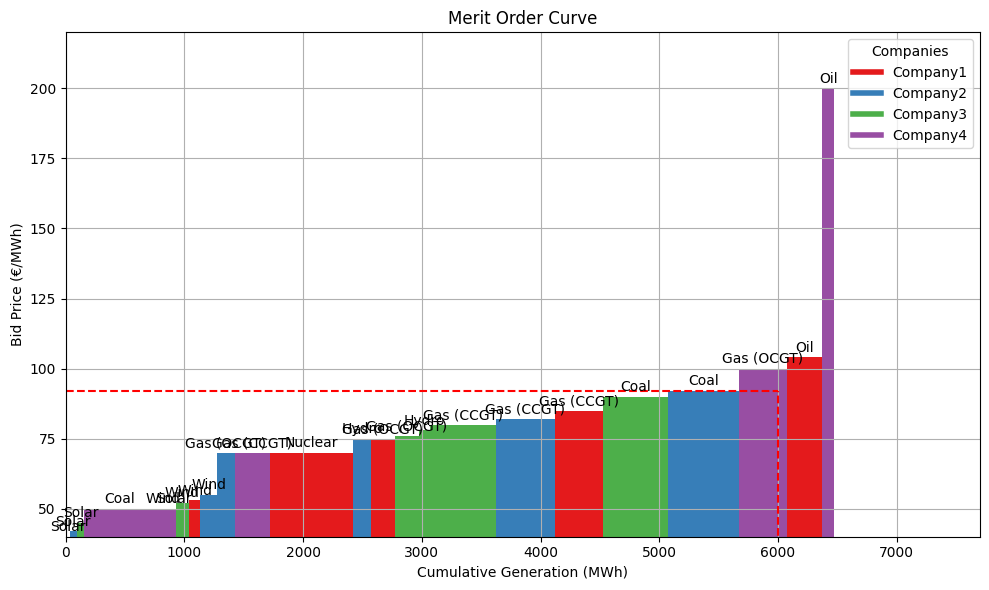

In [15]:
functions_T2.create_merit_order_curve( all_bids_sorted_csv = r'.\results_operator\all_bids_sorted_0.csv', demand = demand, market_result_csv= r'./out_Tutorial2_company4.csv', date = '2024-01-01')